In [ ]:

# import necessary modules
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.spatial.distance import cdist
import seaborn as sns

In [9]:
# 1. Load the dataset and split it into training and testing sets (60:40 ratio)

# Read Project Data
Original_Data = pd.read_excel('Inputs.xlsx')
Data = Original_Data.iloc[1:, 1:]

# Distribution Data ==> %60 train and %40 Test
# random_state=42 for keep sampling results consistent across re-runs.
train_data = Data.sample(frac=0.6, random_state=42)
test_data = Data.drop(train_data.index)

# View Distribution Results
train_data_shape = train_data.shape
test_data_shape = test_data.shape
print("Train data Dimensions:")
display(train_data_shape)
print("\n\nTest data Dimensions:")
display(test_data_shape)

# Export train_data
train_data = pd.DataFrame(train_data)
train_data.to_excel('Train_data.xlsx')

# Export test_data
test_data = pd.DataFrame(test_data)
test_data.to_excel('Test_data.xlsx')

Train data Dimensions:


(299, 11)



Test data Dimensions:


(200, 11)

In [10]:
# 2. Calculate normalization parameters (mean and std) for the training set and normalize both training and testing data using Z-Score normalization

pure_train_data = train_data.iloc[:,:-1]
pure_test_data = test_data.iloc[:,:-1]

# z_score formula for normalization
train_mean = pure_train_data.mean()
train_std  = pure_train_data.std()
train_data_normalized = (pure_train_data - train_mean) / train_std
test_data_normalized  = (pure_test_data - train_mean) / train_std

Train_Label_column = train_data.iloc[:, -1]
Test_Label_column = test_data.iloc[:, -1]

Train_data_normalized_with_Labels = pd.concat([train_data_normalized, Train_Label_column], axis=1)
Test_data_normalized_with_Labels  = pd.concat([test_data_normalized, Test_Label_column], axis=1)

# Export normalized train_data
Normalized_train = pd.DataFrame(Train_data_normalized_with_Labels)
Normalized_train.to_excel('Normalized Train_data.xlsx')

# Export normalized test_data
Normalized_Test = pd.DataFrame(Test_data_normalized_with_Labels)
Normalized_Test.to_excel('Normalized Test_data.xlsx')

# View Sample Normalisation Results
train_data_normalized_head = train_data_normalized.head()
test_data_normalized_head  = test_data_normalized.head()
print("Sample Normalized Train data:")
display(train_data_normalized_head)
print("\n\nSample Normalized Test data:")
display(test_data_normalized_head)

# Evaluate Result
# Z-Score Theory Source: https://www.statology.org/z-score-normalization/
Evaluate_mean_normalized_train_data = train_data_normalized.mean()
Evaluate_std_normalized_train_data  = train_data_normalized.std()
Evaluate_mean_normalized_test_data = test_data_normalized.mean()
Evaluate_std_normalized_test_data  = test_data_normalized.std()

df_Evaluate = pd.DataFrame({
    'Mean Evaluate for Normalized Train': Evaluate_mean_normalized_train_data,
    'Std Evaluate for Normalized Train': Evaluate_std_normalized_train_data,
    'Mean Evaluate for Normalized Test': Evaluate_mean_normalized_test_data,
    'Std Evaluate for Normalized Test': Evaluate_std_normalized_test_data
})

df_Evaluate = df_Evaluate
print("Evaluate Mean and Std values:")
display(df_Evaluate.style.set_properties(**{'text-align': 'center'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
))

Sample Normalized Train data:


,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11
461,1.1618,0.429594,-0.413911,-0.601055,0.499657,2.216254,-0.317558,-0.290152,0.361598,-1.118261
74,-1.326184,-0.496621,1.125296,0.077505,-1.107708,-0.703944,-0.045725,-1.028649,-1.150932,0.316353
232,-1.200845,-0.45924,0.33544,1.431287,-0.861413,-0.193621,0.797018,0.686494,-0.151273,0.485347
176,0.911121,0.823129,-1.264525,-0.680148,1.302115,-0.638301,-1.50446,-0.950172,-0.969354,1.07855
238,0.773258,1.1382,-1.831601,-0.63121,1.527107,-0.557653,0.403803,0.918313,-0.780431,0.604137




Sample Normalized Test data:


,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11
2,-0.630895,-0.505611,0.760747,-0.161558,-0.47616,-0.658187,-0.637856,-0.737868,-1.020992,0.632387
5,-0.07279,0.565537,-1.365789,1.646806,1.142347,2.589118,-0.811308,-0.432467,0.34481,-1.00006
9,0.183731,0.384045,0.294935,-0.685782,-0.023652,-0.478116,-1.037231,-0.896275,-0.888003,-1.195735
13,-0.793497,-1.600164,0.436704,-0.817781,-0.268173,2.205908,-0.800897,-0.358946,-1.019878,-0.564959
14,-0.216918,-0.28959,0.153165,-0.793147,0.029369,-0.847264,-0.022287,-0.274933,0.874555,-1.252306


Evaluate Mean and Std values:


,Mean Evaluate for Normalized Train,Std Evaluate for Normalized Train,Mean Evaluate for Normalized Test,Std Evaluate for Normalized Test
Column2,-0.000000,1.000000,-0.043724,1.074127
Column3,0.000000,1.000000,-0.115209,0.992776
Column4,0.000000,1.000000,0.104589,0.947016
Column5,0.000000,1.000000,-0.189768,0.823195
Column6,0.000000,1.000000,-0.057132,0.968138
Column7,-0.000000,1.000000,0.053364,0.996980
Column8,0.000000,1.000000,0.024821,1.009216
Column9,0.000000,1.000000,0.018324,1.100533
Column10,0.000000,1.000000,-0.051938,0.975878
Column11,-0.000000,1.000000,-0.044620,0.996078


In [11]:
# 3. Build a KNN model with K=3 and t=0, calculate and report RMSE using Euclidean distance

# Load Normalized Train and Test Data
train_data = pd.read_excel('Normalized Train_data.xlsx', index_col=0).to_numpy()
test_data = pd.read_excel('Normalized Test_data.xlsx', index_col=0).to_numpy()

# Get the dimensions of train and test data
n, m = train_data.shape  
p, _ = test_data.shape  

k = 3  
t = 0  

# Initialize the distance matrix (p x n)
distance_matrix = np.zeros((p, n))

# Compute the Euclidean distance for all test points against all training points
for i in range(p):
    for j in range(n):
        distance_matrix[i, j] = np.sqrt(np.sum((test_data[i, :-1] - train_data[j, :-1]) ** 2))


test_targets = np.zeros((p, 1))

# KNN prediction
for i in range(p):
    
    sorted_indices = np.argsort(distance_matrix[i, :])
    k_nearest_distances = distance_matrix[i, sorted_indices[:k]]
    k_nearest_targets = train_data[sorted_indices[:k], -1]
    
    
    if t == 0:
        
        test_targets[i] = np.mean(k_nearest_targets)
    else:
        
        weights = 1 / (k_nearest_distances ** t)
        test_targets[i] = np.sum(weights * k_nearest_targets) / np.sum(weights)


actual_targets = test_data[:, -1] 
rmse = np.sqrt(mean_squared_error(actual_targets, test_targets))
print(f"RMSE: {rmse}")


RMSE: 0.992458308541668



Summary of Results:


,K,T,RMSE
0,1,0,1.168922
1,1,1,1.168922
2,1,3,1.168922
3,5,0,0.995419
4,5,1,0.970373
5,5,3,0.952245
6,20,0,1.150999
7,20,1,1.112533
8,20,3,1.025666


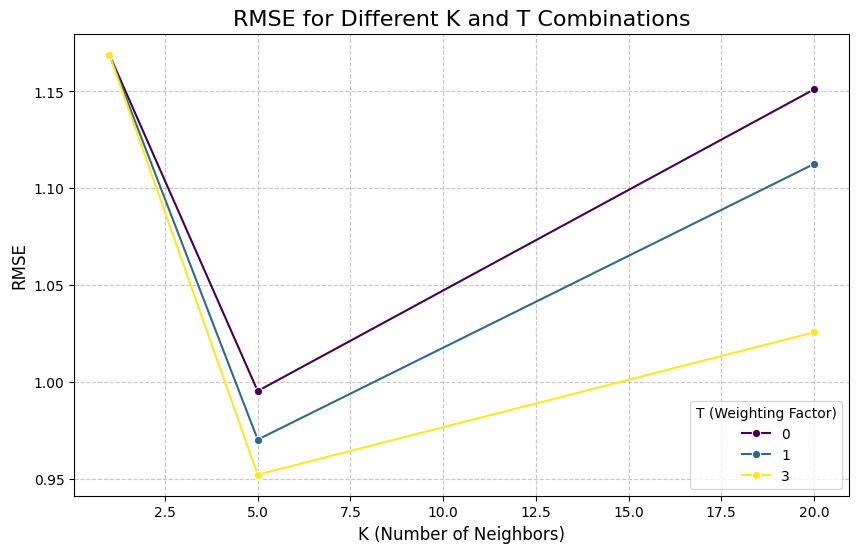

In [12]:
# 4. Test different values of K (1, 5, 20) and t (0, 1, 3), report RMSE for each combination and analyze the results

# Load Normalized Train and Test Data
train_data = pd.read_excel('Normalized Train_data.xlsx', index_col=0).to_numpy()
test_data = pd.read_excel('Normalized Test_data.xlsx', index_col=0).to_numpy()
# Get the dimensions of train and test data
n, m = train_data.shape  
p, _ = test_data.shape   

# Initialize a dictionary to store RMSE results
results = []


k_values = [1, 5, 20]
t_values = [0, 1, 3]

for k in k_values:
    for t in t_values:
        
        distance_matrix = np.zeros((p, n))

        # Compute the Euclidean distance for all test points against all training points
        for i in range(p):
            for j in range(n):
                distance_matrix[i, j] = np.sqrt(np.sum((test_data[i, :-1] - train_data[j, :-1]) ** 2))

        # Initialize the predictions array
        test_targets = np.zeros((p, 1))

        # KNN prediction
        for i in range(p):
            
            sorted_indices = np.argsort(distance_matrix[i, :])
            k_nearest_distances = distance_matrix[i, sorted_indices[:k]]
            k_nearest_targets = train_data[sorted_indices[:k], -1]

            # Compute weighted average of k nearest neighbors
            if t == 0:
                
                test_targets[i] = np.mean(k_nearest_targets)
            else:
                
                weights = 1 / (k_nearest_distances ** t)
                test_targets[i] = np.sum(weights * k_nearest_targets) / np.sum(weights)

        # Calculate RMSE
        actual_targets = test_data[:, -1] 
        rmse = np.sqrt(mean_squared_error(actual_targets, test_targets))
        
        # Store the results
        results.append({'K': k, 'T': t, 'RMSE': rmse})

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['K', 'T']).reset_index(drop=True)


print("\nSummary of Results:")
styled_table = results_df.style.set_properties(**{'text-align': 'center'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
)
display(styled_table)

# Visualization: Plot RMSE for different combinations of K and T
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=results_df,
    x='K', y='RMSE', hue='T', marker='o', palette='viridis'
)
plt.title('RMSE for Different K and T Combinations', fontsize=16)
plt.xlabel('K (Number of Neighbors)', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.legend(title='T (Weighting Factor)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()







Summary of Results:


,Distance Metric,RMSE
0,minkowski,0.991888
1,euclidean,0.992458
2,manhattan,1.018701
3,chebyshev,1.116622


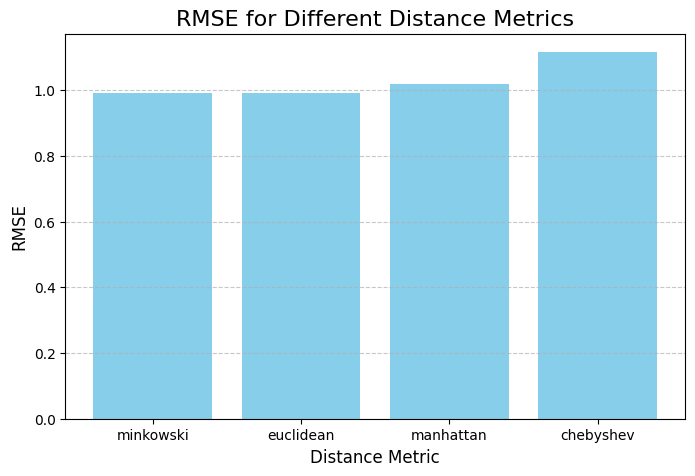

In [13]:
# 5. Test different distance metrics (Euclidean, Manhattan, Minkowski, Chebyshev) in KNN model, calculate and compare RMSE for each distance metric

# Load Normalized Train and Test Data
train_data = pd.read_excel('Normalized Train_data.xlsx', index_col=0).to_numpy()
test_data = pd.read_excel('Normalized Test_data.xlsx', index_col=0).to_numpy()

n, m = train_data.shape  
p, _ = test_data.shape   

# Initialize a dictionary to store RMSE results
results = []

k = 3  
t = 0 

# List of distance metrics to test
distance_metrics = ['euclidean', 'manhattan', 'minkowski', 'chebyshev']

# Function to calculate distances manually
def calculate_distances(test_data, train_data, metric, p_value=2):
    distance_matrix = np.zeros((p, n))
    for i in range(p):
        for j in range(n):
            diff = test_data[i, :-1] - train_data[j, :-1]
            if metric == 'euclidean':
                distance_matrix[i, j] = np.sqrt(np.sum(diff ** 2))
            elif metric == 'manhattan':
                distance_matrix[i, j] = np.sum(np.abs(diff))
            elif metric == 'minkowski':
                distance_matrix[i, j] = (np.sum(np.abs(diff) ** p_value)) ** (1 / p_value)
            elif metric == 'chebyshev':
                distance_matrix[i, j] = np.max(np.abs(diff))
    return distance_matrix

# Loop over each distance metric
for metric in distance_metrics:
    
    # Compute the distance matrix manually
    distance_matrix = calculate_distances(test_data, train_data, metric, p_value=3)

    test_targets = np.zeros((p, 1))

    # KNN prediction
    for i in range(p):
        # Sort distances and get indices of k-nearest neighbors
        sorted_indices = np.argsort(distance_matrix[i, :])
        k_nearest_distances = distance_matrix[i, sorted_indices[:k]]
        k_nearest_targets = train_data[sorted_indices[:k], -1]

        # Compute weighted average of k nearest neighbors
        if t == 0:
            test_targets[i] = np.mean(k_nearest_targets)
        else:
            weights = 1 / (k_nearest_distances ** t)
            test_targets[i] = np.sum(weights * k_nearest_targets) / np.sum(weights)

    # Calculate RMSE
    actual_targets = test_data[:, -1] 
    rmse = np.sqrt(mean_squared_error(actual_targets, test_targets))
    
    # Store the results
    results.append({'Distance Metric': metric, 'RMSE': rmse})

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE').reset_index(drop=True)

# Display results as a styled table
print("\nSummary of Results:")
styled_table = results_df.style.set_properties(**{'text-align': 'center'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
)
display(styled_table)

# Visualization: Plot RMSE for different distance metrics
plt.figure(figsize=(8, 5))
plt.bar(results_df['Distance Metric'], results_df['RMSE'], color='skyblue')
plt.title('RMSE for Different Distance Metrics', fontsize=16)
plt.xlabel('Distance Metric', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()





